# 6.2 Exploring relationships

## Question 1

#### 1.1 Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### 1.2 Import the cleaned dataset from the previous exercise

In [2]:
path = r'C:\Desktop\Careerfoundry\2. Data Analytics Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\6.1 Sourcing Open Data'

In [3]:
df = pd.read_csv(os.path.join(path, '4. Cleaned Dateset with Python.csv'))

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City/Town
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore/Bothell
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish/Redmond


#### 1.3 Data cleaning

Check datatype of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21612 non-null  int64  
 1   id             21612 non-null  int64  
 2   date           21612 non-null  object 
 3   price          21612 non-null  int64  
 4   bedrooms       21612 non-null  int64  
 5   bathrooms      21612 non-null  float64
 6   sqft_living    21612 non-null  int64  
 7   sqft_lot       21612 non-null  int64  
 8   floors         21612 non-null  float64
 9   waterfront     21612 non-null  int64  
 10  view           21612 non-null  int64  
 11  condition      21612 non-null  int64  
 12  grade          21612 non-null  int64  
 13  sqft_above     21612 non-null  int64  
 14  sqft_basement  21612 non-null  int64  
 15  yr_built       21612 non-null  int64  
 16  yr_renovated   21612 non-null  int64  
 17  zipcode        21612 non-null  int64  
 18  lat   

Assure that all columns have appropriate datatypes, The code below is to change them into appropriate ones.

In [6]:
df = df.astype({'id': 'str',
                'price': 'int64', 
                'zipcode': 'str'})

Assure that there are no mixed-type data

In [7]:
for col in df.columns.tolist():
      weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

No mixed-type columns found

## Question 2

#### Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

##### 1. How does the price vary by zipcode (city/town) in King County, WA?
  Variables: price, zipcode
##### 2. What are the top 10 neighborhoods in King County with the highest average home prices?
  Variables:  price, zipcode 
##### 3. What are the top 10 neighborhoods in King County with the lowest average home prices?
Variables:  price, zipcode
##### 4. Does the year the house was built impact its price?
  Variables: price, year_bulit, year_renovated
##### 5. What might the future trend of house prices look like?
Variable: price
##### 6.What other factors/variables, aside from those in the dataset, really affect house prices?
  In this question, I will add some variables which are in the cleaned dataset but not related to the above questions in order to see further insights from what we have. I will choose some variables that I think they might impact the house price which are bedrooms, bathrooms, sqft_living, sqft_lot, floor, waterfront, sqft_above and sqft_basement.


## Question 3

#### 3.1 Correlations:

In [8]:
# Select the related variables from question 2
df_selected = df[['price', 'yr_built', 'yr_renovated', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]

In [9]:
# Create a correlation matrix using pandas
df_selected.corr()

,price,yr_built,yr_renovated,bedrooms,bathrooms,floors,waterfront,sqft_living,sqft_lot,sqft_above,sqft_basement
price,1.000000,0.053993,0.126445,0.315434,0.525144,0.256803,0.266332,0.702055,0.089658,0.605589,0.323833
yr_built,0.053993,1.000000,-0.224885,0.159167,0.506012,0.489302,-0.026165,0.318037,0.053073,0.423879,-0.133103
yr_renovated,0.126445,-0.224885,1.000000,0.019617,0.050735,0.006330,0.092884,0.055358,0.007641,0.023276,0.071330
bedrooms,0.315434,0.159167,0.019617,1.000000,0.529159,0.181085,-0.006611,0.591467,0.032807,0.490600,0.309490
bathrooms,0.525144,0.506012,0.050735,0.529159,1.000000,0.500645,0.063742,0.754663,0.087735,0.685339,0.283789
floors,0.256803,0.489302,0.006330,0.181085,0.500645,1.000000,0.023695,0.353937,-0.005210,0.523866,-0.245684
waterfront,0.266332,-0.026165,0.092884,-0.006611,0.063742,0.023695,1.000000,0.103816,0.021603,0.072072,0.080591
sqft_living,0.702055,0.318037,0.055358,0.591467,0.754663,0.353937,0.103816,1.000000,0.172822,0.876597,0.435065
sqft_lot,0.089658,0.053073,0.007641,0.032807,0.087735,-0.005210,0.021603,0.172822,1.000000,0.183507,0.015293
sqft_above,0.605589,0.423879,0.023276,0.490600,0.685339,0.523866,0.072072,0.876597,0.183507,1.000000,-0.051918


#### 3.2 Create a correlation matrix heatmap (colored)

Create the correlation heatmap in seaborn

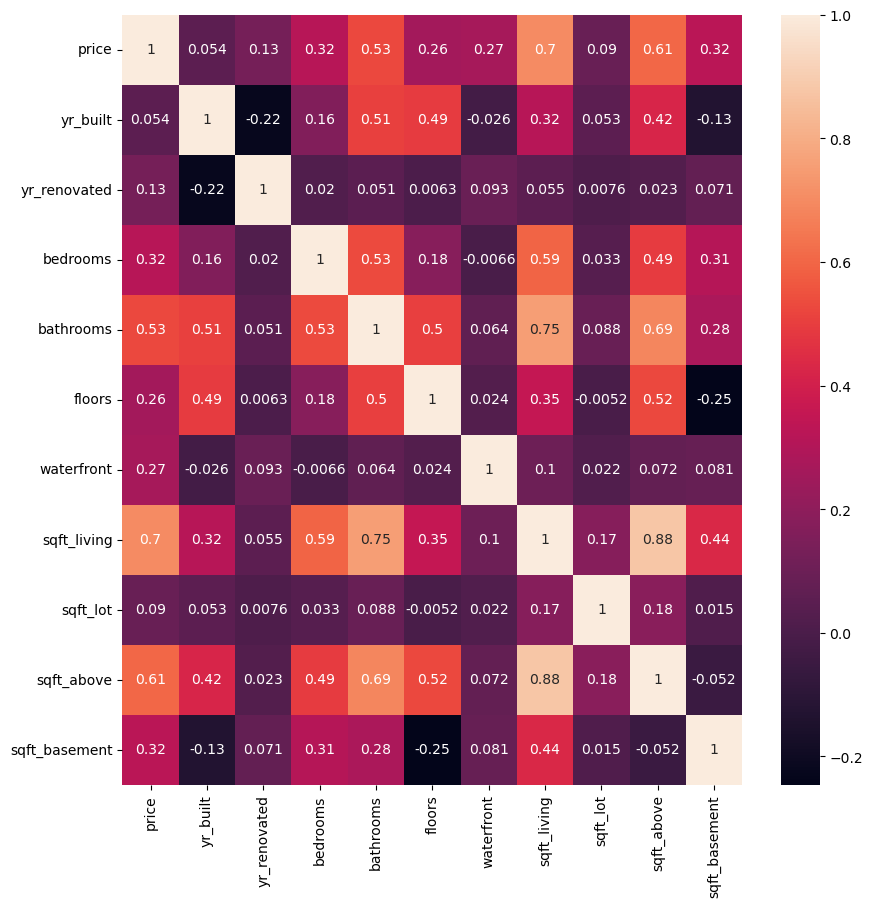

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_selected.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### 3.3 Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

From the correlation heatmap, here are my observations:
1. The 'sqft_living' variable has a coefficient of 0.7, indicating a strong positive relationship with 'house price', stronger than with other variables. This means that the larger the living space of a house (in square feet), the higher the house price will be. This relationship is not limited to just the house price variable; 'sqft_living' shows a similar pattern with most other variables as well. A similar but smaller-scale relationship can also be observed with the 'bathrooms' variable.

2. When comparing 'bedrooms' and 'bathrooms', I found that the number of bathrooms appears to have a stronger relationship with the house price than the number of bedrooms.

3. 'Year built' has a very weak positive relationship with the house price, with a coefficient of only 0.13. This suggests that whether a house is old or new doesn't significantly affect the price, which surprised me, as common understanding might suggest otherwise. This could be an area for further investigation by the analysis team. There may be underlying reasons for this, such as regional differences in buyer behavior.

## Question 4

#### 4.1 Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

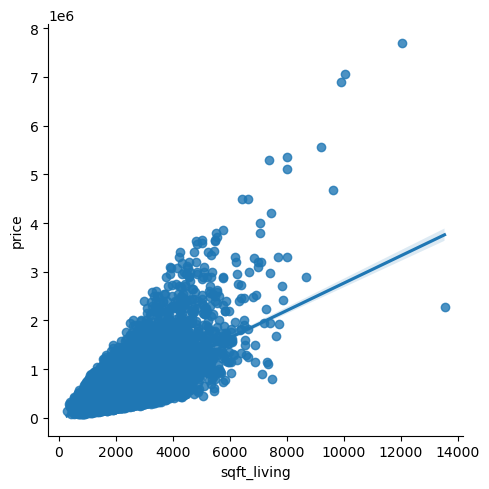

In [11]:
# Create a scatterplot for the 'sqft_living' and 'price' columns in seaborn

sns.lmplot(x = 'sqft_living', y = 'price', data = df_selected)

#### 4.2 Discuss the output in a markdown cell

1. As mentioned before, 'sqft_living' has a strong positive correlation with 'price'. As sqft_living increases, the price of the house tends to increase as well, meaning bigger houses generally cost more.

2. Another observation is that most of the data is clustered at lower sqft_living values (below 6,000 square feet), indicating that most houses are smaller and fall within this range. In this range, house prices increase steeply. However, beyond 6,000 square feet, the price doesn’t rise as quickly, showing that larger sizes add less value at that point.

## Question 5

#### 5.1 Create a pair plot of the entire data set.

In [12]:
# Only keep variables that I see I might get some interesting insights.
# This step will be available only numerical variables.
df_selected2 = df_selected[['price', 'yr_built', 'bathrooms', 'floors', 'sqft_living']]

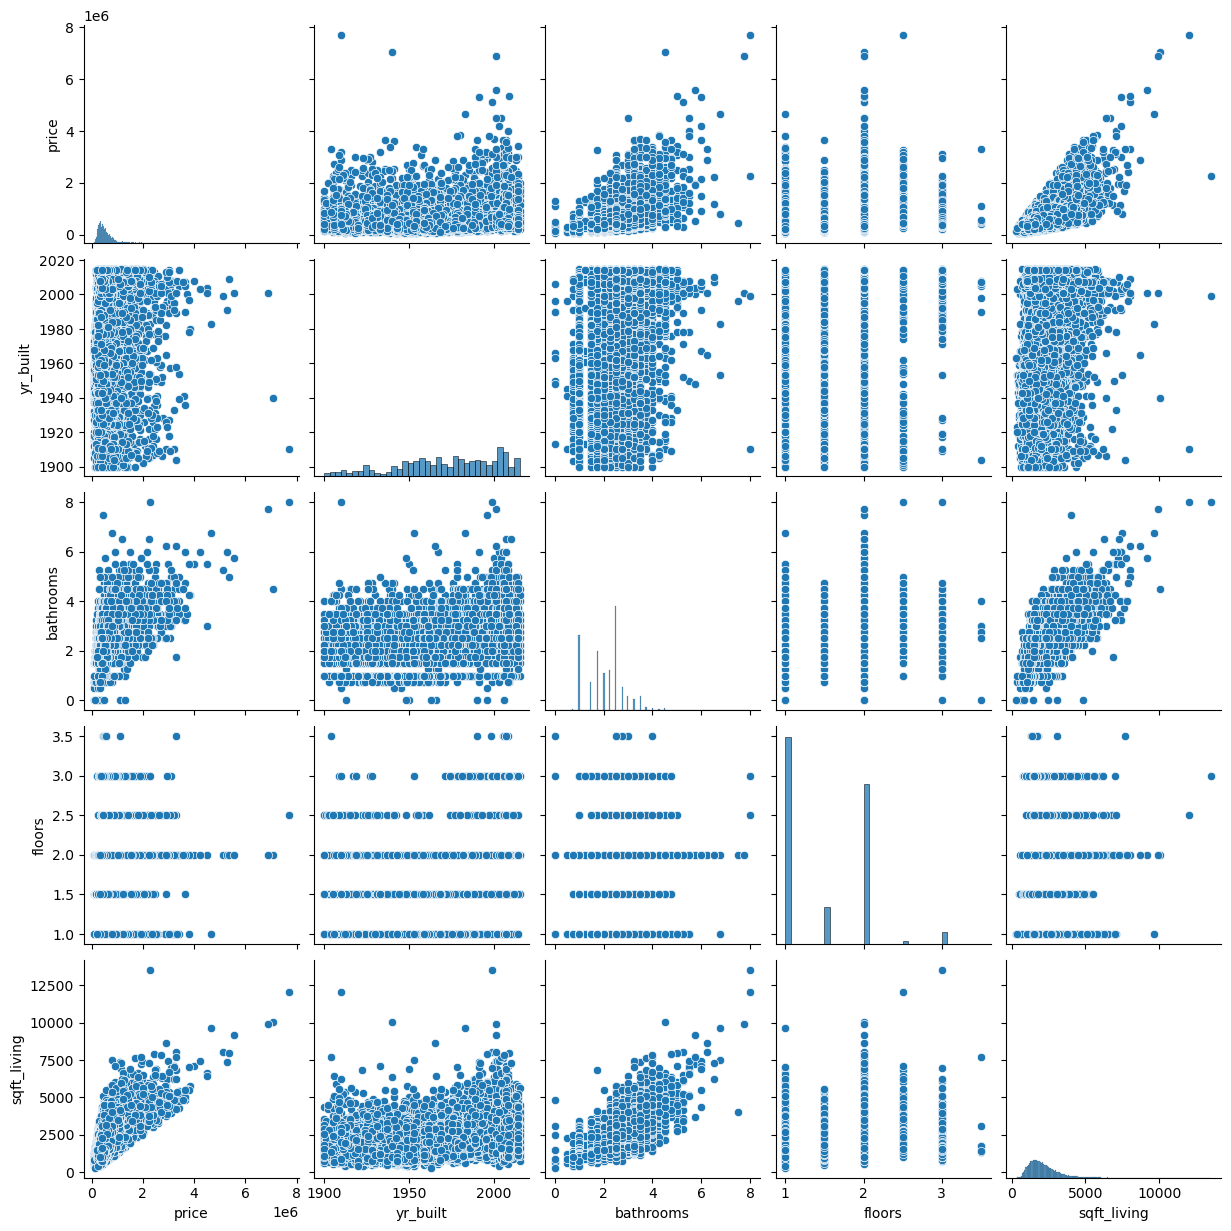

In [13]:
# Create a pair plot
g = sns.pairplot(df_selected2)

#### 5.2 Comment on the distribution of the variables

1. price vs sqrt_living, bathrooms vs sqrt_living, price vs bathrooms
- These paired variables have a significantly strong positive relationship, which means that when one value is higher, the other is also higher.

2. price vs year_built
- It does not matter what year the houses were built; they show the same pattern and fall within the price range of 50K to 300K. However, I observed that there is a slightly higher number of houses built in recent years, and their prices tend to be higher as well.

#### 5.3 Mark variables you’d like to explore further with an explanation of why.

I would like to explore more about zip codes because the plots do not provide much information. When analyzing house prices, geographical variables are also very important. Gaining insights into these variables could help make useful predictions, such as understanding house buyer behavior by region, which might benefit companies.

## Question 6

### Create a categorical plot

#### 6.1 Creating a categorical variable that splits the 'price' column into categories

<Axes: xlabel='price', ylabel='Count'>

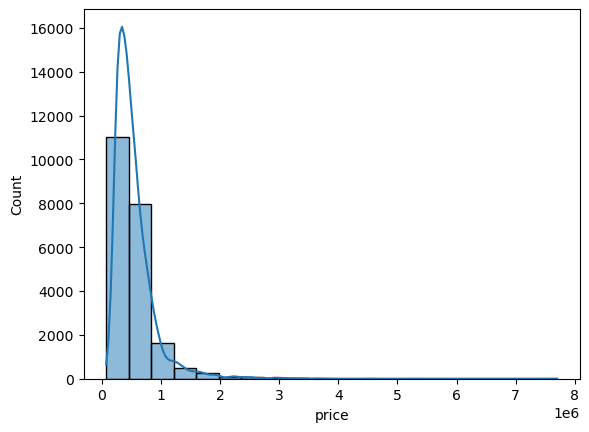

In [14]:
sns.histplot(df['price'], bins = 20, kde = True)

In [15]:
df['price'].min()

75000

In [16]:
df['price'].max()

7700000

As we can see from the minimum and maximum values, the price spans a wide range of 75,000 to 7,700,000.
The histogram helps identify sensible categories for these wide price ranges. Although the values in the 'low price' group may not seem low, they are appropriate when compared to the overall distribution shown in the histogram.

Price categories:

- Price < 800k: Low price
- Price >= 800k and < 3,850,000: Medium price
- Price >= 3,850,000: High price

In [17]:
df.loc[df['price'] < 800000, 'Price category'] = 'Low price'

In [18]:
df.loc[(df['price'] >= 800000) & (df['price'] < 3850000), 'Price category'] = 'Medium price'

In [19]:
df.loc[df['price'] >= 3850000, 'Price category'] = 'High price'

In [20]:
df['Price category'].value_counts(dropna = False)

Price category
Low price       18610
Medium price     2989
High price         13
Name: count, dtype: int64

#### House price vs living square feet

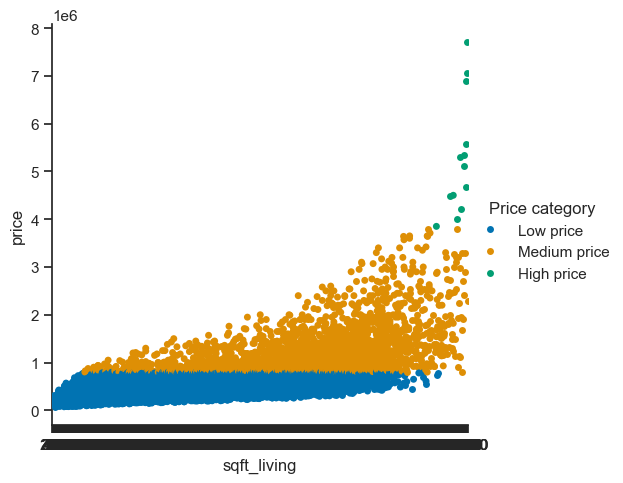

In [21]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
g = sns.catplot(x="sqft_living", y="price", hue="Price category", data=df, palette="colorblind")

#### Interpret the results.

Prices clearly increase as square footage grows, indicating a positive relationship.

1. Low Price: Properties in this group have smaller square footage and lower prices. They are concentrated in the bottom-left corner of the chart.

2. Medium Price: The majority of properties fall into this category. It spans a broader range of square footage and prices compared to the low-price group.

3. High Price: This category includes fewer properties with the largest square footage and highest prices. A few outliers in this group represent luxury homes.

There is some overlap between the low and medium categories, as well as between the medium and high categories. There might be some factors such as location or property condition, also influence prices.

#### 6.2 Creating a categorical variable that splits the 'year built' column into categories

<Axes: xlabel='yr_built', ylabel='Count'>

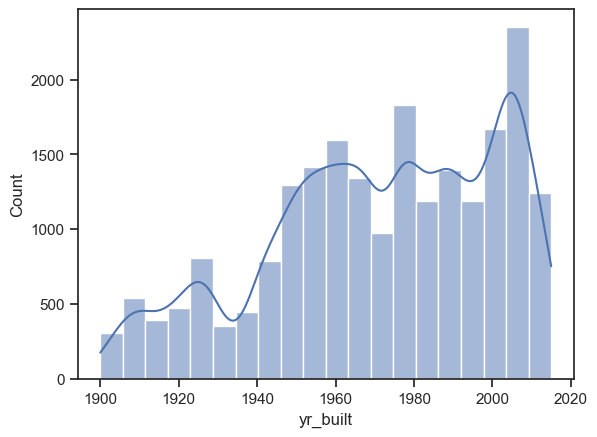

In [22]:
sns.histplot(df['yr_built'], bins = 20, kde = True)

In [23]:
df['yr_built'].min()

1900

In [24]:
df['yr_built'].max()

2015

As we can see from the minimum and maximum values, the year built spans a wide range of 1900 - 2015.
I am going to categorize them into the 3 groups below

Year built categories:

- yr_built < 1940: Old house
- yr_built >= 1940 and < 1980: Middle-aged house
- yr_built >= 1980: New house

In [25]:
df.loc[df['yr_built'] < 1940, 'Year built category'] = 'Old house'

In [26]:
df.loc[(df['yr_built'] >= 1940) & (df['yr_built'] < 1980), 'Year built category'] = 'Middle-aged house'

In [27]:
df.loc[df['yr_built'] >= 1980, 'Year built category'] = 'New house'

In [28]:
df['Year built category'].value_counts(dropna = False)

Year built category
New house            9279
Middle-aged house    9160
Old house            3173
Name: count, dtype: int64

#### House price vs year built

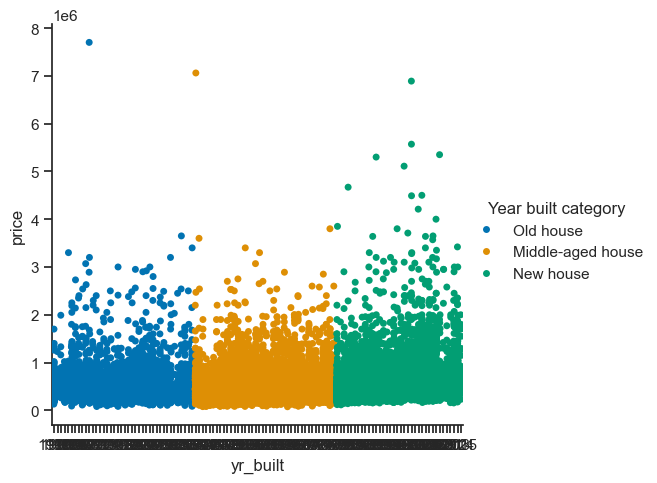

In [29]:
# Create a categorical plot in seaborn using the Year built category created above
sns.set(style="ticks")
g = sns.catplot(x="yr_built", y="price", hue="Year built category", data=df, palette="colorblind")

#### Interpret the results

1. Old Houses: These are typically less expensive and are positioned on the left side of the chart, representing older construction years.

2. Middle-aged Houses: Prices in this group show more variation, with some outliers that are higher than those in the old house group.

3. New Houses: These tend to have the highest prices, with a few extreme outliers. They are located on the right side of the chart, reflecting recent construction years.

Overall, newer houses generally cost more, but price variation exists across all categories. There could be factors that explain why the price of an older house might be on the same level as a newer house. For example, some older houses may have been renovated, which can increase their price to a similar level as newer houses. Additionally, in some locations, the price base may be higher than in others, influencing the overall price.

## Question 7

#### 7.1 Write answers to the questions you generated in the previous task you can based on the exploration you’ve conducted so far. 

I cannot answer some of the questions because they are related to the zipcode variable, which is declared as a string datatype. In this exercise, we use numerical variables to calculate correlations and find relationships with other variables, so the zipcode (as a string) was not used to answer those questions.
One question, I can answer is

##### Question
Does the year the house was built impact its price?

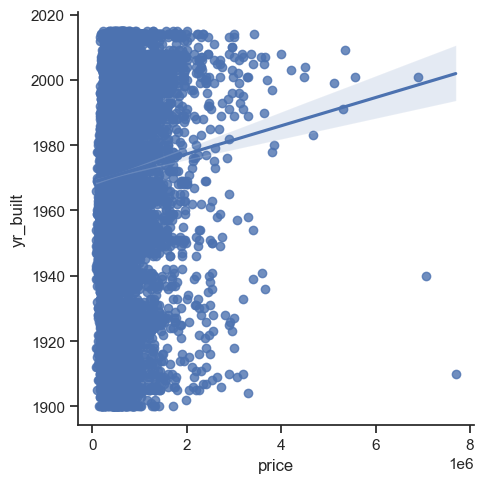

In [30]:
sns.lmplot(x = 'price', y = 'yr_built', data = df_selected)

##### Answer
From the scatterplot, house price has a slight impact on some houses, but overall, it does not have a strong effect. We can see that price variation exists across different years built. The average price falls within the range of 2,000,000, with a few outliers that are much higher than the average.

#### 7.2 Add any new questions that may have arisen based on the early findings in your visual exploration.

I am curious to know if the number of bedrooms and bathrooms really impacts the house price. From my understanding, bedrooms are typically seen as more essential for accommodating family members than bathrooms. So, I am using scatterplots to compare the relationship between:

- Price vs. Bedrooms
- Price vs. Bathrooms

##### price vs bedrooms

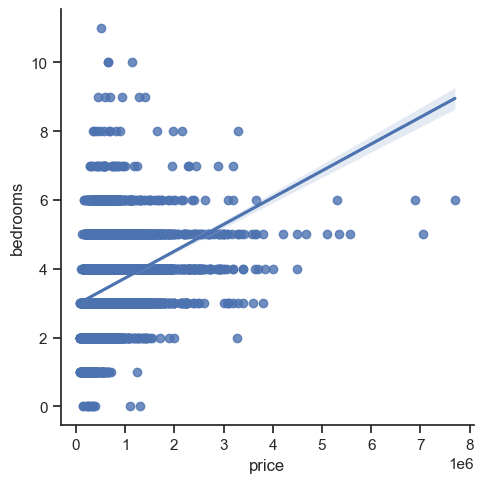

In [31]:
sns.lmplot(x = 'price', y = 'bedrooms', data = df_selected)

##### price vs bathrooms

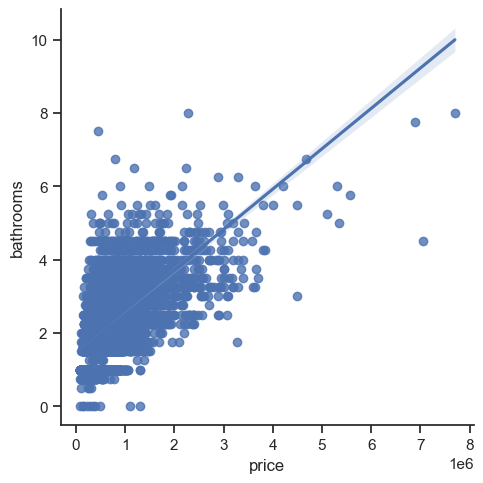

In [32]:
sns.lmplot(x = 'price', y = 'bathrooms', data = df_selected)

As we can see when comparing the two charts above, the number of bathrooms appears to have a closer relationship with price than the number of bedrooms. The trend line for bathrooms is steeper than for bedrooms, which means that as the number of bathrooms increases, the price is more likely to rise as well, and vice versa (when comparing the bedrooms variable).

Additionally, if we look closely at the bedrooms chart, we see many houses with 6–10 bedrooms that still fall within a lower price range.

Therefore, I would conclude from the chart that house prices are more strongly influenced by the number of bathrooms than by the number of bedrooms.

## Question 8

#### Define any hypotheses that you can at this point. You’ll be testing these later on.

Here are the hypotheses I have regarding the data I have gathered so far in this exercise:

1. Increasing the number of square feet (sqft_living) will lead to a higher house price.
2. Houses with a newer year built (after 1980) are more likely to have higher house prices.
3. Houses with two floors are more likely to have higher house prices.
4. The future trend of house prices will remain stable, with a slight increase.
5. Different zip codes have significant differences that will cause varying house prices in each neighborhood. Some neighborhoods will have higher house prices than others.

For hypotheses 4 and 5, these are not based on the data from this task. They are just my opinion, and I will definitely need to gather more data to determine whether they are correct.